<a href="https://colab.research.google.com/github/teng-yu-an/Text-Mining-of-ESG/blob/main/%E6%96%87%E5%AD%97%E6%8E%A2%E5%8B%98_%E9%87%91%E8%9E%8D%E6%A5%AD_ESG_%E6%96%B0%E8%81%9E%E7%A8%BF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

本專案挑了幾間金融業的官網上ESG 的相關新聞稿做文字探勘。

經過爬蟲將各家幾篇新聞稿的文字爬下來，並做頻詞、關鍵字的分析，
藉以了解各家目前發展ESG 的策略方向，以及所反映的企業文化，或許可以作為面試該公司的參考方向。



`註：ESG 分別是環境保護（E，Environmental）、社會責任（S，Social）以及公司治理（G，governance）的縮寫，是一種新型態評估企業的數據與指標，ESG代表的是企業社會責任，許多企業或投資人會將ESG 評分，視為評估一間企業是否永續經營重要的指標及投資決策。`

In [ ]:
import numpy as np
import pandas as pd
import requests
from bs4 import BeautifulSoup

### **step1: 爬蟲**

使用requests, BeautifulSoup 將網頁上新聞稿的文字內容爬下來，並去除標點符號後，將每篇新聞稿的文字內容以逗點分割存入list 



1. 爬取玉山金控 ESG 新聞稿 4 篇

In [ ]:
url = ['https://www.esunfhc.com/zh-tw/news-center/news-center/news?previewItemID={9765EFDF-E3EB-451D-B09C-B24506B6860F}&filter={99812C02-BA70-4D57-8203-AF374D8DB2E5}&range=&previewType=news',
       'https://www.esunfhc.com/zh-tw/news-center/news-center/news?previewItemID={1737F282-3BD9-4FC3-B9BC-343D92E60E0F}&filter={99812C02-BA70-4D57-8203-AF374D8DB2E5}&range=&previewType=news',
       'https://www.esunfhc.com/zh-tw/news-center/news-center/news?previewItemID={43B36B5C-2643-4BB1-8D69-416BD2303552}&filter={99812C02-BA70-4D57-8203-AF374D8DB2E5}&range=&previewType=news',
       'https://www.esunfhc.com/zh-tw/news-center/news-center/news?previewItemID={FD09652C-E839-4AFD-B826-1D182B99ECA7}&filter={99812C02-BA70-4D57-8203-AF374D8DB2E5}&range=&previewType=news']

def GetText(url: str) -> str:
    res = requests.get(url)
    soup = BeautifulSoup(res.text,"lxml")
    content_get = soup.select(".longContent")
    text_list = []
    for p in content_get:
      text_list.append(p.text.replace('[^\w\s]','').replace('／',"").replace('《','').replace('》','').replace('，','').replace('。','').replace('「','').replace('」','').replace('（','').replace('）','').replace('！','').replace('？','').replace('、','').replace('\r','').replace('…','').replace('：','').replace('\n',''))
      text_list = ','.join(text_list)
    return text_list

esun_list = []
for i in url:
  esun_list.append(GetText(i))

2. 爬取國泰金控 ESG 新聞稿 6 篇



In [ ]:
url = ['https://www.cathayholdings.com/holdings/information-centre/intro/latest-news/detail?news=Q98kdWnXrUGNfla0RRop0Q',
       'https://www.cathayholdings.com/holdings/information-centre/intro/latest-news/detail?news=MBTbMZrIXUes-UA0ssj0Dw',
       'https://www.cathayholdings.com/holdings/information-centre/intro/latest-news/detail?news=vuq-xD3dC0G6wQ5c6CDfhg',
       'https://www.cathayholdings.com/holdings/information-centre/intro/latest-news/detail?news=EjDqZLCMpUOBD9Y0QPyU1A',
       'https://www.cathayholdings.com/holdings/information-centre/intro/latest-news/detail?news=ZBow5uxs50eBNHz450CsPw',
       'https://www.cathayholdings.com/holdings/information-centre/intro/latest-news/detail?news=qfU5mN6PHU-Y6QtnbWyPBg']

def GetText_Cathay(url: str) -> str:
    res = requests.get(url)
    soup = BeautifulSoup(res.text,"lxml")
    content_get = soup.select(".section-content")
    text_list = []
    for p in content_get:
      text_list.append(p.text.replace('[^\w\s]','').replace('／',"").replace('《','').replace('》','').replace('，','').replace('。','').replace('「','').replace('」','').replace('（','').replace('）','').replace('！','').replace('？','').replace('、','').replace('\r','').replace('…','').replace('：','').replace('\n',''))
      text_list = ','.join(text_list)
    return text_list
  
cathay_list = []
for i in url:
  cathay_list.append(GetText_Cathay(i))

3. 爬取元大金控 ESG 新聞稿新聞稿 6 篇

In [ ]:
url = ['https://www.yuanta.com/TW/News-and-Media/ESG-Press-Releases/Detail?id=4b952683-621d-4b16-afbf-bbd4673e6470',
       'https://www.yuanta.com/TW/News-and-Media/ESG-Press-Releases/Detail?id=ff72b0f5-6794-4562-99b3-051cb604da82',
       'https://www.yuanta.com/TW/News-and-Media/ESG-Press-Releases/Detail?id=cc782e4b-231e-47df-883f-9ec702d07ece',
       'https://www.yuanta.com/TW/News-and-Media/ESG-Press-Releases/Detail?id=9ee7abc7-a3e4-4126-8fb8-4ba0064d9317',
       'https://www.yuanta.com/TW/News-and-Media/ESG-Press-Releases/Detail?id=1fee497d-ca79-47e2-8682-3df26a57e35b',
       'https://www.yuanta.com/TW/News-and-Media/ESG-Press-Releases/Detail?id=347af8c7-1ffe-424a-bded-173a8bd06a17']

def GetText_Yuanta(url: str) -> str:
    res = requests.get(url)
    soup = BeautifulSoup(res.text,"lxml")
    content_get = soup.select(".article")
    text_list = []
    for p in content_get:
      text_list.append(p.text.replace('[^\w\s]','').replace('／',"").replace('《','').replace('》','').replace('，','').replace('。','').replace('「','').replace('」','').replace('（','').replace('）','').replace('！','').replace('？','').replace('、','').replace('\r','').replace('…','').replace('：','').replace('\n',''))
      text_list = ','.join(text_list)
    return text_list
  
yuanta_list = []
for i in url:
  yuanta_list.append(GetText_Yuanta(i))

### **step2: 前處理--斷詞、排除停用詞，整理為 Corpus**

使用 opencc 將簡體字轉繁體字，再用 nltk 去除停用詞，如一天、不如、之前⋯⋯

In [ ]:
!pip install opencc
from opencc import OpenCC
cc = OpenCC('s2t') # 簡體字轉繁體字

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stopWords = stopwords.words('chinese')
stopWords = [cc.convert(word) for word in stopWords]

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


使用 jieba 將文本進行斷詞，下載斷詞的字典

In [ ]:
!pip install jieba
import jieba
!wget 'https://raw.githubusercontent.com/fxsjy/jieba/master/extra_dict/dict.txt.big'
jieba.set_dictionary('dict.txt.big')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
--2022-11-14 16:27:20--  https://raw.githubusercontent.com/fxsjy/jieba/master/extra_dict/dict.txt.big
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 8583143 (8.2M) [text/plain]
Saving to: ‘dict.txt.big.1’

dict.txt.big.1      100%[===================>]   8.18M  --.-KB/s    in 0.07s   

2022-11-14 16:27:20 (123 MB/s) - ‘dict.txt.big.1’ saved [8583143/8583143]



將三家新聞稿文字使用 jieba.lcut 斷詞後排除停用詞（Stop Words），分詞結果以空白連接

esun_content, cathay_content, yuanta_content 即為 Corpus，我自己理解為已斷詞的多篇文本

In [ ]:
esun_content = []
for i in esun_list:
   seg_list = jieba.lcut(i)
   remainder_words = list(filter(lambda text: text not in stopWords and len(text) > 1, seg_list))
   remainder_words = ' '.join(remainder_words)
   esun_content.append(remainder_words)

Building prefix dict from /content/dict.txt.big ...
DEBUG:jieba:Building prefix dict from /content/dict.txt.big ...
Loading model from cache /tmp/jieba.u501edca284da514cb68b53a20324f4e3.cache
DEBUG:jieba:Loading model from cache /tmp/jieba.u501edca284da514cb68b53a20324f4e3.cache
Loading model cost 1.504 seconds.
DEBUG:jieba:Loading model cost 1.504 seconds.
Prefix dict has been built successfully.
DEBUG:jieba:Prefix dict has been built successfully.


In [ ]:
cathay_content = []
for i in cathay_list:
   seg_list = jieba.lcut(i)
   remainder_words = list(filter(lambda text: text not in stopWords and len(text) > 1, seg_list))
   remainder_words = ' '.join(remainder_words)
   cathay_content.append(remainder_words)

In [ ]:
yuanta_content = []
for i in yuanta_list:
   seg_list = jieba.lcut(i)
   remainder_words = list(filter(lambda text: text not in stopWords and len(text) > 1, seg_list))
   remainder_words = ' '.join(remainder_words)
   yuanta_content.append(remainder_words) # yuanta_content: 已斷詞的多篇文本（去掉停用詞）== Corpus

將三份 Corpus 整理成整理成 dataframe 並新增欄位為各自名稱

In [ ]:
rawdata = pd.concat([
                pd.DataFrame({'content': esun_content,
                              'label': ['esun'] * len(esun_content)}),
                pd.DataFrame({'content': cathay_content,
                              'label': ['cathay'] * len(cathay_content)}),
                pd.DataFrame({'content': yuanta_content,
                              'label': ['yuanta'] * len(yuanta_content)}),
                             ],
                axis=0)
rawdata.reset_index(drop=True, inplace=True)
rawdata['content'] = rawdata['content'].str.replace(r'\d', '') # 去除 Corpus 中的數字

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: The default value of regex will change from True to False in a future version.
  # This is added back by InteractiveShellApp.init_path()


In [ ]:
rawdata

,content,label
0,第二屆 工商時報 數位 金融 頒獎典禮 玉山 銀行 榮獲 數位 普惠獎 金質獎 數位 業務...,esun
1,行政院 勞動部 舉辦 工作 生活 平衡 頒獎典禮 玉山 金控 優於 法令 制度 職家 ...,esun
2,玉山 金控 長期 致力 推廣 海洋資源 永續 觀念 維護 生物 多樣性 保育 實際行動 響應...,esun
3,FinTech Taipei 台北 金融 科技展 世貿中心 展覽 一館 開幕 玉山 銀行...,esun
4,返回 國泰 世華好 聯名卡 合約 屆期 聲明 國泰 世華 銀行 好市 Costco 聯名卡 ...,cathay
5,返回 國泰 永續 金融 氣候變遷 高峰 論壇 登場 獨家 雙語 轉播 埃及 COP...,cathay
6,返回 國泰 金控 金融 科技 發展 蟬聯 數位 金融 贏家 疫情 反覆 金融 科技 生活 場...,cathay
7,返回 國泰 金控 市府 AWS 打造 高雄 國泰 AWS 國際金融 創新 中心 聚焦 創新 ...,cathay
8,返回 道路 救援 call 阿發 國泰 產險 首創 智能 客服 申請 道路 救援 小時 全...,cathay
9,返回 國泰 新花樣 金融 自由 聽不膩 數錢聲 實體化 Gold Noise 登陸 台北 金...,cathay


### **step3: 使用 TF-IDF, TextRank, jeiba 計算詞頻及關鍵字**

1. TF-IDF



In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
# 詞頻
# 建立計算每個term在doc有多少個
cv = CountVectorizer(tokenizer=lambda x: x.split()) 
text_count_vector = cv.fit_transform(rawdata['content']).toarray()

In [ ]:
ESUN = pd.DataFrame({'玉山關鍵字': cv.get_feature_names(),
                          '字頻': text_count_vector[rawdata.label == 'esun'].mean(axis=0).tolist()}).sort_values(by='字頻', ascending=False).reset_index(drop=True)
CATHAY = pd.DataFrame({'國泰關鍵字': cv.get_feature_names(),
                          '字頻': text_count_vector[rawdata.label == 'cathay'].mean(axis=0).tolist()}).sort_values(by='字頻', ascending=False).reset_index(drop=True)
YUANTA = pd.DataFrame({'元大關鍵字': cv.get_feature_names(),
                          '字頻': text_count_vector[rawdata.label == 'yuanta'].mean(axis=0).tolist()}).sort_values(by='字頻', ascending=False).reset_index(drop=True)

COUNT_DF = pd.concat([ESUN, CATHAY, YUANTA],axis=1)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


下表為三家 ESG 新聞稿的前 20 高字頻，玉山和國泰都多次提到「顧客」、「數位」、「金融」、「服務」，兩者可能在策略上較著重在提供消費者數位金融服務的部分，希望提升服務的滿意度；而元大則是「員工」、「健康」、「運動」、「企業」較常被提到，可以推測元大可能對於公司治理這塊，關於員工照顧的部分有特別用心。

In [ ]:
display(COUNT_DF.head(20))

,玉山關鍵字,字頻,國泰關鍵字,字頻,元大關鍵字,字頻
0,玉山,10.25,國泰,15.333333,健康,8.166667
1,顧客,5.50,金融,9.166667,員工,5.833333
2,數位,5.25,數位,7.833333,永續,5.833333
3,金融,4.50,服務,6.666667,企業,4.833333
4,提供,3.50,創新,6.333333,運動,4.166667
5,服務,3.50,基金,5.333333,元大金控,3.333333
6,企業,3.25,產險,4.333333,發展,3.000000
7,海龜,3.00,金控,3.666667,職場,3.000000
8,銀行,2.75,發展,3.500000,元大,3.000000
9,保育,2.50,科技,3.166667,同仁,2.833333


In [ ]:
# 關鍵字
vectorizer = TfidfVectorizer(sublinear_tf=False, token_pattern="(?u)\\b\\w+\\b", smooth_idf=True, max_features=128)  
tfidf_feature = vectorizer.fit_transform(rawdata['content']).toarray()

In [ ]:
ESUN = pd.DataFrame({'玉山關鍵字': vectorizer.get_feature_names(),
                          'AVG_TFID': tfidf_feature[rawdata.label == 'esun'].mean(axis=0).tolist()}).sort_values(by='AVG_TFID', ascending=False).reset_index(drop=True)
CATHAY = pd.DataFrame({'國泰關鍵字': vectorizer.get_feature_names(),
                          'AVG_TFID': tfidf_feature[rawdata.label == 'cathay'].mean(axis=0).tolist()}).sort_values(by='AVG_TFID', ascending=False).reset_index(drop=True)
YUANTA = pd.DataFrame({'元大關鍵字': vectorizer.get_feature_names(),
                          'AVG_TFID': tfidf_feature[rawdata.label == 'yuanta'].mean(axis=0).tolist()}).sort_values(by='AVG_TFID', ascending=False).reset_index(drop=True)

TFIDF_SCORE_DF = pd.concat([ESUN, CATHAY, YUANTA],axis=1)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


下表為三家計算出來的關鍵字分數由高至低，跟詞頻的表格所呈現的結果有點類似

In [ ]:
TFIDF_SCORE_DF.head(20)

,玉山關鍵字,AVG_TFID,國泰關鍵字,AVG_TFID,元大關鍵字,AVG_TFID
0,玉山,0.447433,國泰,0.353251,健康,0.280822
1,顧客,0.200475,金融,0.158543,員工,0.216738
2,數位,0.173364,數位,0.136870,永續,0.205418
3,海龜,0.153579,創新,0.122849,元大金控,0.147969
4,保育,0.127983,cube,0.122091,運動,0.136388
5,金融,0.121446,產險,0.108484,供應商,0.131073
6,員工,0.109980,聯名卡,0.100705,元大,0.130755
7,生態,0.102386,服務,0.095081,企業,0.130728
8,銀行,0.100901,基金,0.092202,職場,0.111788
9,健康,0.094269,救援,0.092117,學生,0.098208


2. TextRank

In [ ]:
!pip install textrank4zh
from textrank4zh import TextRank4Keyword, TextRank4Sentence

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


將三家的所有文本都放在一起，並使用 TextRank 看關鍵的結果，「金融」、「數位」、「服務」都有上榜，跟 TF-IDF 所做出來的結果很接近

In [ ]:
print('\n所有文章關鍵詞：')
tr4w = TextRank4Keyword()
tr4w.analyze(text=' '.join(rawdata['content'].tolist()), lower=True, window=2)
# window: 窗口大小，用於建構窗口內單詞之間的鏈結關係，default=2
# lower: 是否將英文文本轉換為小寫，default=False
for item in tr4w.get_keywords(20, word_min_len=1):
	# word_min_len: 最小關鍵詞長度
    print(item.word, item.weight)


min_occur_num = 2
print('\n文本中至少出現 {} 次的關鍵詞：'.format(min_occur_num))
for phrase in tr4w.get_keyphrases(keywords_num=20, min_occur_num=min_occur_num):
    print(phrase)
	# keywords_num: 返回的關鍵詞個數
	# min_occur_num: 關鍵詞在文本中至少出現__次


print('\n摘要：')
tr4s = TextRank4Sentence()
tr4s.analyze(text=' '.join(rawdata['content'].tolist()), lower=True, source='all_filters')
for item in tr4s.get_key_sentences(num=5, sentence_min_len=30):
	print(item.index, item.weight, item.sentence)
    # 獲取 num 個句子長度大於等於 sentence_min_len 的句子，用來生成摘要
    # num: 輸出__個句子
    # sentence_min_len: 句子長度至少__字
    # index: 該語句在文本中的位置


所有文章關鍵詞：
國泰 0.00972424557597952
金融 0.008580432081122183
服務 0.007886123888575814
玉山 0.0063658112710292345
數位 0.006191007344611051
提供 0.006032368529385446
企業 0.006006414280535672
員工 0.005426927636234029
發展 0.005201433036546712
透過 0.0051044914657251235
基金 0.004707395154558266
創新 0.0042434072030908725
公司 0.00416656271061574
運動 0.004154206791007472
國際 0.003946220931033325
體驗 0.003926406099162245
合作 0.0036870240192388216
顧客 0.0036396905435827276
同仁 0.0035694853031197323
投資 0.0034736447953316756

文本中至少出現 2 次的關鍵詞：

摘要：
0 0.9999999999999999 第二屆 工商時報 數位 金融  頒獎典禮 玉山 銀行 榮獲 數位 普惠獎 金質獎 數位 業務 優化 優質 獎及 玉山 證券 榮獲 綠色 數位 金融 優質 總計 榮獲 金質獎 優質 肯定 玉山 金融 科技領域 長期 顧客 需求 核心 持續 優化 顧客 體驗 面對 COVID  疫情 衝擊 全球 興起 接觸 服務 玉山 銀行  辦理 勞工 貸款 主打 快速 主動 接觸 全線 申貸 服務 透過 數位 平台 建置 顧客 申請 補件 簽約 在家 線上 進件 比率 高達 % 針對 數位化 程度 不高 須要 臨櫃 諮詢 顧客 提供 貸款 預約 平台 顧客 事先 預約 指定 時間 分行 系統 針對 人潮 計算 分流 類型 顧客 享有 絕佳 申貸 體驗 提供 貸款 進度 查詢 平台 顧客 隨時 自主 查詢 申貸 進度 因應 案件 階段 主動 發送 簡訊 顧客 更能 辦理 情形 玉山 銀行 科技 加速器 內部 透過 自動 審核 模型 機器人 流程 自動化 每案 審核 時間  分鐘 最快 可至  透過 系統  小時 不間斷 自動 

3. jieba

In [ ]:
import jieba.analyse

for x, w in jieba.analyse.textrank(' '.join(rawdata['content'].tolist()), withWeight=True):
    print('%s %s' % (x, w))


金融 1.0
數位 0.8195260133596048
服務 0.769852734057675
企業 0.619376610647133
提供 0.5479907907273435
員工 0.5454430298968609
創新 0.5314150783170796
發展 0.5060642902389435
玉山 0.5038364687665737
基金 0.5002887786821534
透過 0.4056447050957432
運動 0.3804878856425931
公司 0.32426202348338806
體驗 0.31669178208898413
大金 0.3152801584865475
資訊 0.31310132900931104
科技 0.311597137624992
產險 0.3052874908186301
客戶 0.2907518710660662
保險 0.28190556641666165


In [ ]:
#--- 關鍵詞提取
keywords1=jieba.analyse.extract_tags(' '.join(rawdata['content'].tolist()))
print("/ ".join(keywords1))


國泰/ 數位/ 服務/ 永續/ 企業/ 創新/ 員工/ 發展/ 金融/ 玉山/ 透過/ 金控/ 健康/ 運動/ 產險/ 體驗/ 資訊/ 證券/ 顧客/ 職場


In [ ]:
# topn 關鍵字
keywords_top_esun = jieba.analyse.extract_tags(' '.join(rawdata[rawdata.label == 'esun']['content'].tolist()), # 字詞
                                        topK=20, # 前幾名
                                        withWeight=True)
# 是否要計算分數
# 背後原理應該也是 tfidf(待確認) , 跟自己做的比較在於，自己的沒有太多著墨在超參數的調整 例如正則的方法
keywords_top_cathy = jieba.analyse.extract_tags(' '.join(rawdata[rawdata.label == 'cathy']['content'].tolist()), # 字詞
                                        topK=20, # 前幾名
                                        withWeight=True)
keywords_top_yuanta = jieba.analyse.extract_tags(' '.join(rawdata[rawdata.label == 'yuanta']['content'].tolist()), # 字詞
                                        topK=20, # 前幾名
                                        withWeight=True)

In [ ]:
JIEBA_SCORE_DF = pd.concat([
              pd.DataFrame(keywords_top_esun,
             columns=['玉山關鍵字', 'score']), 
             pd.DataFrame(keywords_top_cathy,
             columns=['國泰關鍵字', 'score']), 
             pd.DataFrame(keywords_top_yuanta,
             columns=['元大關鍵字', 'score'])],axis=1)

display(JIEBA_SCORE_DF.head(20))

,玉山關鍵字,score,國泰關鍵字,score,元大關鍵字,score
0,玉山,0.310618,NaN,NaN,員工,0.243975
1,顧客,0.218443,NaN,NaN,永續,0.243975
2,數位,0.208513,NaN,NaN,企業,0.202151
3,服務,0.139009,NaN,NaN,運動,0.174268
4,企業,0.129080,NaN,NaN,健康,0.170472
5,海龜,0.119151,NaN,NaN,元大金控,0.139414
6,銀行,0.109221,NaN,NaN,職場,0.125473
7,透過,0.089363,NaN,NaN,發展,0.125473
8,保育,0.088080,NaN,NaN,元大,0.125473
9,榮獲,0.079434,NaN,NaN,推動,0.097590


#### **step4: 以 word2vec 看關鍵字間的距離**

In [ ]:
from gensim.models import word2vec

In [ ]:
content = rawdata['content']
content = [i.split(' ') for i in content] 
'''
transform to list of list  ex: [
                                ['hi', 'how', 'are', 'you'], 
                                ['i', 'fine', 'thank', 'you']
                                ]
'''

"\ntransform to list of list  ex: [\n                                ['hi', 'how', 'are', 'you'], \n                                ['i', 'fine', 'thank', 'you']\n                                ]\n"

In [ ]:
word2vec_model = word2vec.Word2Vec(size=128)
word2vec_model.build_vocab(content)
word2vec_model.train(content, total_examples=len(content),epochs=20)

(39448, 113340)

跟「玉山」較接近的 10 個詞有以下這些，看起來較偏向是一些生活上因疫情而造成的轉變，像是線上支付等

In [ ]:
word2vec_model.wv.most_similar('玉山', topn=10)

[('提供', 0.9999040365219116),
 ('支付', 0.9998879432678223),
 ('線上', 0.9998876452445984),
 ('透過', 0.999884843826294),
 ('即可', 0.9998674988746643),
 ('推出', 0.9998663663864136),
 ('現場', 0.9998654127120972),
 ('資訊', 0.9998628497123718),
 ('%', 0.9998618364334106),
 ('', 0.9998605251312256)]

而「國泰」則有出現信用卡，另外也一樣有線上流程生活等詞彙

In [ ]:
word2vec_model.wv.most_similar('國泰', topn=10)

[('', 0.9998745322227478),
 ('服務', 0.9998670220375061),
 ('線上', 0.999854326248169),
 ('全球', 0.9998481869697571),
 ('透過', 0.9998476505279541),
 ('證券', 0.9998407959938049),
 ('%', 0.999835729598999),
 ('國際', 0.9998352527618408),
 ('資訊', 0.999835193157196),
 ('數位', 0.999832272529602)]

與「元大」接近的則較偏向推動一些員工活動，以及與國際社會挑戰等詞較接近

In [ ]:
word2vec_model.wv.most_similar('元大', topn=10)

[('分享', 0.9998464584350586),
 ('活動', 0.999838650226593),
 ('員工', 0.9998368620872498),
 ('提供', 0.99983149766922),
 ('職場', 0.9998223781585693),
 ('企業', 0.999821126461029),
 ('元大金控', 0.9998184442520142),
 ('夥伴', 0.999813437461853),
 ('社團', 0.9998128414154053),
 ('工作', 0.9998127818107605)]

In [ ]:
word2vec_feature = []
for sentence in content:
  word2vec_feature.append(np.mean([word2vec_model.wv[word] for word in sentence if word in word2vec_model.wv], axis=0))
word2vec_feature = np.stack(word2vec_feature)
label = rawdata['label']

以 TSNE 來視覺化關鍵字之間的距離，這裡將所有關鍵字都視為變數

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import manifold, datasets
X_tsne = manifold.TSNE(n_components=2, init='random', random_state=5, verbose=1).fit_transform(word2vec_feature)

[t-SNE] Computing 15 nearest neighbors...
[t-SNE] Indexed 16 samples in 0.002s...
[t-SNE] Computed neighbors for 16 samples in 0.006s...
[t-SNE] Computed conditional probabilities for sample 16 / 16
[t-SNE] Mean sigma: 1125899906842624.000000
[t-SNE] KL divergence after 250 iterations with early exaggeration: 55.708485
[t-SNE] KL divergence after 950 iterations: 0.358763


/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


In [ ]:
#Data Visualization
x_min, x_max = X_tsne.min(0), X_tsne.max(0)
X_norm = (X_tsne - x_min) / (x_max - x_min)  #Normalize

In [ ]:
d = {'esun': 1,
    'cathy': 2,
     'yuanta': 3}
label = label.map(d)

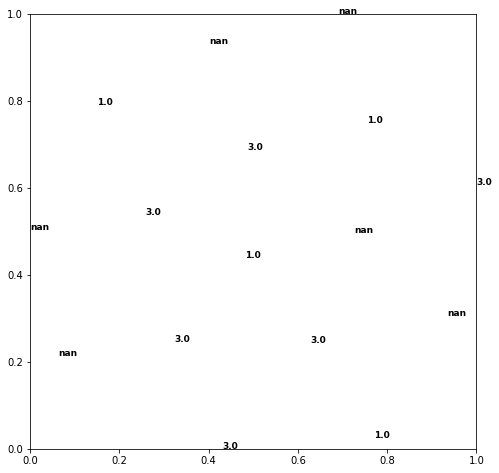

In [ ]:
#Data Visualization
x_min, x_max = X_tsne.min(0), X_tsne.max(0)
X_norm = (X_tsne - x_min) / (x_max - x_min)  #Normalize
plt.figure(figsize=(8, 8))
for i in range(X_norm.shape[0]):
    plt.text(X_norm[i, 0], X_norm[i, 1],
             label[i],
             fontdict={'weight': 'bold', 'size': 9})